In [95]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import time
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [73]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
#removed high null values
train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [77]:
## Fill Missing Values

train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [79]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [81]:
test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [82]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mode()[0])
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mode()[0])
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

In [84]:
train = train.apply(LabelEncoder().fit_transform)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,5,3,36,327,1,3,3,0,4,...,0,0,0,0,0,1,2,8,4,412
1,1,0,3,52,498,1,3,3,0,2,...,0,0,0,0,0,4,1,8,4,339
2,2,5,3,39,702,1,0,3,0,4,...,0,0,0,0,0,8,2,8,4,442
3,3,6,3,31,489,1,0,3,0,0,...,108,0,0,0,0,1,0,8,0,194
4,4,5,3,56,925,1,0,3,0,2,...,0,0,0,0,0,11,2,8,4,494


In [85]:
test = test.apply(LabelEncoder().fit_transform)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,2,57,777,1,3,3,0,4,...,0,0,0,18,0,0,5,4,8,4
1,1,0,3,58,964,1,0,3,0,0,...,24,0,0,0,0,24,5,4,8,4
2,2,5,3,51,947,1,0,3,0,4,...,22,0,0,0,0,0,2,4,8,4
3,3,5,3,55,587,1,0,3,0,4,...,24,0,0,0,0,0,5,4,8,4
4,4,11,3,19,118,1,0,1,0,4,...,68,0,0,27,0,0,0,4,8,4


In [86]:
train.drop(['Id'],axis=1,inplace=True)

In [87]:
test.drop(['Id'],axis=1,inplace=True)

In [93]:
columns = ['SalePrice']
y = train['SalePrice']
X = train.drop(columns, axis=1)

1. feature 3 (0.038344)
2. feature 44 (0.037943)
3. feature 41 (0.037539)
4. feature 35 (0.036229)
5. feature 36 (0.035686)
6. feature 60 (0.035284)
7. feature 2 (0.032051)
8. feature 71 (0.031803)
9. feature 32 (0.031031)
10. feature 57 (0.030900)
11. feature 17 (0.030694)
12. feature 18 (0.028565)
13. feature 65 (0.026158)
14. feature 64 (0.024080)
15. feature 10 (0.023994)
16. feature 72 (0.022185)
17. feature 24 (0.021762)
18. feature 52 (0.021363)
19. feature 42 (0.020814)
20. feature 22 (0.019778)
21. feature 21 (0.018780)
22. feature 15 (0.018446)
23. feature 31 (0.015833)
24. feature 16 (0.015632)
25. feature 0 (0.014499)
26. feature 49 (0.014232)
27. feature 54 (0.012167)
28. feature 30 (0.011906)
29. feature 58 (0.011477)
30. feature 38 (0.011338)
31. feature 14 (0.011230)
32. feature 8 (0.011069)
33. feature 23 (0.010807)
34. feature 5 (0.010619)
35. feature 55 (0.010069)
36. feature 51 (0.009525)
37. feature 59 (0.009512)
38. feature 27 (0.009327)
39. feature 74 (0.009186)


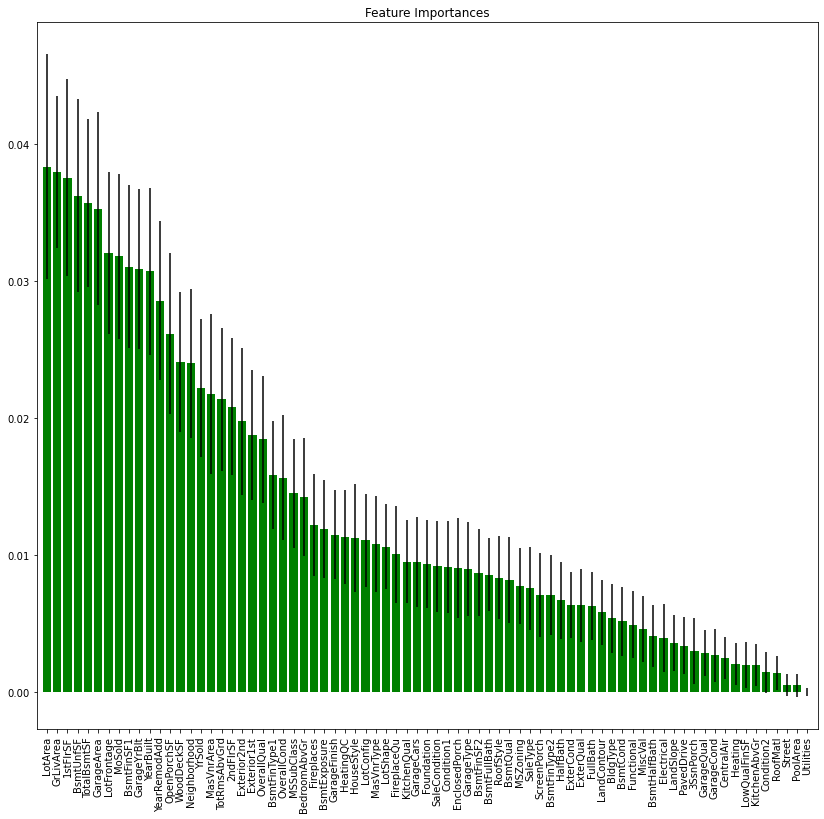

In [96]:
from sklearn.ensemble import RandomForestClassifier

rcf = RandomForestClassifier()      
rcf = rcf.fit(X,y)
importances = rcf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rcf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [101]:
forest_scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(forest_scores.mean()))

c:\users\dasuni\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 

In [15]:
data = pd.concat([train, test],axis=0, sort='False', ignore_index = True)

In [16]:
data = data[data.columns.difference(['Id'])]

In [17]:
ids = test["Id"]

In [21]:
#Encoding categorical data
data = pd.get_dummies(data)

In [22]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,1,0,1,1,0


In [23]:
train = data.iloc[:1460,:] #Upto 1460 rows from first
test = data.iloc[1460:,:] # From 1461th row to last
X_train = train[train.columns.difference(['SalePrice'])].values
y_train = train[['SalePrice']].values
X_test = test[test.columns.difference(['SalePrice'])].values

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, PowerTransformer
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train = sc_y.fit_transform(y_train)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [25]:
flat_y = y_train.flatten()
flat_y.shape

(1460,)

In [26]:
from sklearn.model_selection import KFold, cross_val_score
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [27]:
import lightgbm as lgb
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, flat_y)
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=250)
# predict
lgbm_prediction_tr = gbm.predict(X_train, num_iteration=gbm.best_iteration)
lgbm_prediction_te = gbm.predict(X_test, num_iteration=gbm.best_iteration)

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004175 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [28]:
train["lgb"] = lgbm_prediction_tr
test["lgb"] = lgbm_prediction_te

<ipython-input-28-62b945ab7fd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["lgb"] = lgbm_prediction_tr
<ipython-input-28-62b945ab7fd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["lgb"] = lgbm_prediction_te


In [29]:
y_pred = sc_y.inverse_transform(lgbm_prediction_te)

In [30]:
y_pred

array([127731.51149753, 158447.75564793, 182780.99594701, ...,
       150656.44600983, 119572.81164518, 216670.7344612 ])

In [31]:
data = pd.concat([train, test],axis=0, sort='False', ignore_index = True)
data = data[data.columns.difference(['Id'])]
train = data.iloc[:1460,:]
test = data.iloc[1460:,:]
X_train = train[train.columns.difference(['SalePrice'])].values
y_train = train[['SalePrice']].values
X_test = test[test.columns.difference(['SalePrice'])].values
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train = sc_y.fit_transform(y_train)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [51]:
#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =64, kernel_initializer='he_uniform', activation= 'relu', 
                input_dim=X_train.shape[1]))
#Add the second hidden layer
model.add(Dense(units =32, kernel_initializer='he_uniform', activation= 'relu'))
#Add the second hidden layer

model.add(Dense(units =64, kernel_initializer='he_uniform', activation= 'relu'))
#The output layer
model.add(Dense(units =1, kernel_initializer='he_uniform'))

In [52]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                17728     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 21,985
Trainable params: 21,985
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
#Compiling the ANN
#opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='Adamax', loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
model.fit(X_train,y_train, validation_split=0.2, batch_size=10, epochs=1000, callbacks=[checkpoint])
model.load_weights(model_filepath)

Epoch 1/1000
114/117 [============================>.] - ETA: 0s - loss: 0.1028 - mse: 1.2030
Epoch 00001: val_loss improved from inf to 0.08487, saving model to min_vl_model.h5
117/117 [==============================] - 1s 4ms/step - loss: 0.1023 - mse: 1.2115 - val_loss: 0.0849 - val_mse: 1.4405
Epoch 2/1000
 94/117 [=======================>......] - ETA: 0s - loss: 0.0540 - mse: 1.1760
Epoch 00002: val_loss improved from 0.08487 to 0.07505, saving model to min_vl_model.h5
117/117 [==============================] - 1s 12ms/step - loss: 0.0556 - mse: 1.2110 - val_loss: 0.0750 - val_mse: 1.3181
Epoch 3/1000
110/117 [===========================>..] - ETA: 0s - loss: 0.0462 - mse: 1.0897
Epoch 00003: val_loss improved from 0.07505 to 0.06783, saving model to min_vl_model.h5
117/117 [==============================] - 0s 3ms/step - loss: 0.0459 - mse: 1.0753 - val_loss: 0.0678 - val_mse: 1.3140
Epoch 4/1000
 99/117 [========================>.....] - ETA: 0s - loss: 0.0433 - mse: 1.0936
Epoc

Epoch 30/1000
114/117 [============================>.] - ETA: 0s - loss: 0.0127 - mse: 0.7651
Epoch 00030: val_loss improved from 0.05159 to 0.05151, saving model to min_vl_model.h5
117/117 [==============================] - 1s 5ms/step - loss: 0.0126 - mse: 0.7637 - val_loss: 0.0515 - val_mse: 1.2135
Epoch 31/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0123 - mse: 0.7664
Epoch 00031: val_loss did not improve from 0.05151
117/117 [==============================] - 0s 1ms/step - loss: 0.0124 - mse: 0.7701 - val_loss: 0.0523 - val_mse: 1.1946
Epoch 32/1000
106/117 [==========================>...] - ETA: 0s - loss: 0.0107 - mse: 0.7952   
Epoch 00032: val_loss did not improve from 0.05151
117/117 [==============================] - 0s 1ms/step - loss: 0.0123 - mse: 0.7967 - val_loss: 0.0525 - val_mse: 1.2198
Epoch 33/1000
 99/117 [========================>.....] - ETA: 0s - loss: 0.0125 - mse: 0.7952
Epoch 00033: val_loss did not improve from 0.05151
117/117 [========

Epoch 60/1000
115/117 [============================>.] - ETA: 0s - loss: 0.0110 - mse: 0.6204   
Epoch 00060: val_loss improved from 0.04961 to 0.04958, saving model to min_vl_model.h5
117/117 [==============================] - 1s 9ms/step - loss: 0.0111 - mse: 0.6280 - val_loss: 0.0496 - val_mse: 1.0827
Epoch 61/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0114 - mse: 0.6162   
Epoch 00061: val_loss improved from 0.04958 to 0.04842, saving model to min_vl_model.h5
117/117 [==============================] - 1s 5ms/step - loss: 0.0113 - mse: 0.6112 - val_loss: 0.0484 - val_mse: 1.0205
Epoch 62/1000
 91/117 [======================>.......] - ETA: 0s - loss: 0.0116 - mse: 0.6053   
Epoch 00062: val_loss did not improve from 0.04842
117/117 [==============================] - 0s 2ms/step - loss: 0.0102 - mse: 0.6229 - val_loss: 0.0489 - val_mse: 1.0672
Epoch 63/1000
101/117 [========================>.....] - ETA: 0s - loss: 0.0106 - mse: 0.6517
Epoch 00063: val_loss did

Epoch 90/1000
 77/117 [==================>...........] - ETA: 0s - loss: 0.0077 - mse: 0.5066
Epoch 00090: val_loss did not improve from 0.04607
117/117 [==============================] - 0s 2ms/step - loss: 0.0100 - mse: 0.5271 - val_loss: 0.0467 - val_mse: 0.8803
Epoch 91/1000
108/117 [==========================>...] - ETA: 0s - loss: 0.0107 - mse: 0.5077
Epoch 00091: val_loss did not improve from 0.04607
117/117 [==============================] - 0s 1ms/step - loss: 0.0102 - mse: 0.5023 - val_loss: 0.0461 - val_mse: 0.8774
Epoch 92/1000
 89/117 [=====================>........] - ETA: 0s - loss: 0.0085 - mse: 0.5344
Epoch 00092: val_loss did not improve from 0.04607
117/117 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.5139 - val_loss: 0.0473 - val_mse: 0.8416
Epoch 93/1000
 97/117 [=======================>......] - ETA: 0s - loss: 0.0078 - mse: 0.5030
Epoch 00093: val_loss improved from 0.04607 to 0.04578, saving model to min_vl_model.h5
117/117 [===========

Epoch 150/1000
106/117 [==========================>...] - ETA: 0s - loss: 0.0073 - mse: 0.3132
Epoch 00150: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0069 - mse: 0.3082 - val_loss: 0.0453 - val_mse: 0.6272
Epoch 151/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0070 - mse: 0.3164
Epoch 00151: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0069 - mse: 0.3144 - val_loss: 0.0445 - val_mse: 0.6497
Epoch 152/1000
 60/117 [==============>...............] - ETA: 0s - loss: 0.0079 - mse: 0.3249    
Epoch 00152: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0070 - mse: 0.3060 - val_loss: 0.0443 - val_mse: 0.6462
Epoch 153/1000
 61/117 [==============>...............] - ETA: 0s - loss: 0.0065 - mse: 0.3000
Epoch 00153: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms

Epoch 181/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0054 - mse: 0.2587   
Epoch 00181: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.2585 - val_loss: 0.0448 - val_mse: 0.6017
Epoch 182/1000
114/117 [============================>.] - ETA: 0s - loss: 0.0054 - mse: 0.2600   
Epoch 00182: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.2602 - val_loss: 0.0439 - val_mse: 0.6147
Epoch 183/1000
109/117 [==========================>...] - ETA: 0s - loss: 0.0056 - mse: 0.2633   
Epoch 00183: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.2581 - val_loss: 0.0445 - val_mse: 0.6109
Epoch 184/1000
 61/117 [==============>...............] - ETA: 0s - loss: 0.0030 - mse: 0.2212
Epoch 00184: val_loss did not improve from 0.04361
117/117 [==============================] - 0

Epoch 212/1000
111/117 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.2159
Epoch 00212: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.2174 - val_loss: 0.0447 - val_mse: 0.5505
Epoch 213/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0052 - mse: 0.2156   
Epoch 00213: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.2211 - val_loss: 0.0439 - val_mse: 0.5521
Epoch 214/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0055 - mse: 0.2227   
Epoch 00214: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.2175 - val_loss: 0.0441 - val_mse: 0.5391
Epoch 215/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0055 - mse: 0.2197   
Epoch 00215: val_loss did not improve from 0.04361
117/117 [==============================] - 0

Epoch 243/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0052 - mse: 0.1803
Epoch 00243: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.1853 - val_loss: 0.0440 - val_mse: 0.4993
Epoch 244/1000
105/117 [=========================>....] - ETA: 0s - loss: 0.0052 - mse: 0.1868   
Epoch 00244: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.1846 - val_loss: 0.0444 - val_mse: 0.5017
Epoch 245/1000
 61/117 [==============>...............] - ETA: 0s - loss: 0.0051 - mse: 0.2006    
Epoch 00245: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.1855 - val_loss: 0.0442 - val_mse: 0.4928
Epoch 246/1000
114/117 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.1812
Epoch 00246: val_loss did not improve from 0.04361
117/117 [==============================] - 0s 

Epoch 273/1000
108/117 [==========================>...] - ETA: 0s - loss: 0.0049 - mse: 0.1568
Epoch 00273: val_loss improved from 0.04271 to 0.04215, saving model to min_vl_model.h5
117/117 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.1572 - val_loss: 0.0422 - val_mse: 0.4522
Epoch 274/1000
101/117 [========================>.....] - ETA: 0s - loss: 0.0048 - mse: 0.1634   
Epoch 00274: val_loss did not improve from 0.04215
117/117 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.1570 - val_loss: 0.0434 - val_mse: 0.4567
Epoch 275/1000
109/117 [==========================>...] - ETA: 0s - loss: 0.0049 - mse: 0.1585   
Epoch 00275: val_loss did not improve from 0.04215
117/117 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.1565 - val_loss: 0.0429 - val_mse: 0.4499
Epoch 276/1000
111/117 [===========================>..] - ETA: 0s - loss: 0.0045 - mse: 0.1571
Epoch 00276: val_loss did not improve from 0.04215
117/117 [=

Epoch 303/1000
110/117 [===========================>..] - ETA: 0s - loss: 0.0045 - mse: 0.1500
Epoch 00303: val_loss improved from 0.04095 to 0.04082, saving model to min_vl_model.h5
117/117 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.1495 - val_loss: 0.0408 - val_mse: 0.4241
Epoch 304/1000
103/117 [=========================>....] - ETA: 0s - loss: 0.0047 - mse: 0.1401   
Epoch 00304: val_loss did not improve from 0.04082
117/117 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.1436 - val_loss: 0.0417 - val_mse: 0.4380
Epoch 305/1000
114/117 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.1457   
Epoch 00305: val_loss did not improve from 0.04082
117/117 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.1465 - val_loss: 0.0409 - val_mse: 0.4222
Epoch 306/1000
106/117 [==========================>...] - ETA: 0s - loss: 0.0048 - mse: 0.1476   
Epoch 00306: val_loss did not improve from 0.04082
117/117

Epoch 333/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0043 - mse: 0.1334   
Epoch 00333: val_loss did not improve from 0.03979
117/117 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.1327 - val_loss: 0.0399 - val_mse: 0.4105
Epoch 334/1000
111/117 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.1320   
Epoch 00334: val_loss did not improve from 0.03979
117/117 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.1323 - val_loss: 0.0406 - val_mse: 0.4129
Epoch 335/1000
109/117 [==========================>...] - ETA: 0s - loss: 0.0044 - mse: 0.1310   
Epoch 00335: val_loss did not improve from 0.03979
117/117 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.1306 - val_loss: 0.0402 - val_mse: 0.4173
Epoch 336/1000
110/117 [===========================>..] - ETA: 0s - loss: 0.0041 - mse: 0.1285   
Epoch 00336: val_loss did not improve from 0.03979
117/117 [==============================] 

108/117 [==========================>...] - ETA: 0s - loss: 0.0043 - mse: 0.1264
Epoch 00363: val_loss improved from 0.03874 to 0.03872, saving model to min_vl_model.h5
117/117 [==============================] - 1s 6ms/step - loss: 0.0042 - mse: 0.1279 - val_loss: 0.0387 - val_mse: 0.3971
Epoch 364/1000
109/117 [==========================>...] - ETA: 0s - loss: 0.0044 - mse: 0.1261   
Epoch 00364: val_loss improved from 0.03872 to 0.03870, saving model to min_vl_model.h5
117/117 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.1270 - val_loss: 0.0387 - val_mse: 0.4003
Epoch 365/1000
107/117 [==========================>...] - ETA: 0s - loss: 0.0044 - mse: 0.1262   
Epoch 00365: val_loss did not improve from 0.03870
117/117 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.1270 - val_loss: 0.0393 - val_mse: 0.3965
Epoch 366/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0044 - mse: 0.1283   
Epoch 00366: val_loss improved from 

Epoch 393/1000
114/117 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.1203   
Epoch 00393: val_loss improved from 0.03755 to 0.03744, saving model to min_vl_model.h5
117/117 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.1204 - val_loss: 0.0374 - val_mse: 0.3883
Epoch 394/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.1189
Epoch 00394: val_loss did not improve from 0.03744
117/117 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.1193 - val_loss: 0.0382 - val_mse: 0.3839
Epoch 395/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0041 - mse: 0.1208   
Epoch 00395: val_loss did not improve from 0.03744
117/117 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.1206 - val_loss: 0.0380 - val_mse: 0.3873
Epoch 396/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.1178
Epoch 00396: val_loss did not improve from 0.03744
117/117 [=

117/117 [==============================] - ETA: 0s - loss: 0.0028 - mse: 0.1129   
Epoch 00423: val_loss did not improve from 0.03722
117/117 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.1129 - val_loss: 0.0383 - val_mse: 0.3898
Epoch 424/1000
117/117 [==============================] - ETA: 0s - loss: 0.0027 - mse: 0.1117
Epoch 00424: val_loss did not improve from 0.03722
117/117 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.1117 - val_loss: 0.0379 - val_mse: 0.3851
Epoch 425/1000
 61/117 [==============>...............] - ETA: 0s - loss: 0.0017 - mse: 0.1074    
Epoch 00425: val_loss did not improve from 0.03722
117/117 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.1108 - val_loss: 0.0381 - val_mse: 0.3866
Epoch 426/1000
117/117 [==============================] - ETA: 0s - loss: 0.0026 - mse: 0.1111
Epoch 00426: val_loss did not improve from 0.03722
117/117 [==============================] - 0s 1ms/step - loss

Epoch 454/1000
 95/117 [=======================>......] - ETA: 0s - loss: 0.0023 - mse: 0.1003   
Epoch 00454: val_loss did not improve from 0.03722
117/117 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.1094 - val_loss: 0.0384 - val_mse: 0.3935
Epoch 455/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0024 - mse: 0.1084   
Epoch 00455: val_loss did not improve from 0.03722
117/117 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.1107 - val_loss: 0.0379 - val_mse: 0.3845
Epoch 456/1000
116/117 [============================>.] - ETA: 0s - loss: 0.0023 - mse: 0.1103
Epoch 00456: val_loss did not improve from 0.03722
117/117 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.1099 - val_loss: 0.0379 - val_mse: 0.3892
Epoch 457/1000
 60/117 [==============>...............] - ETA: 0s - loss: 0.0030 - mse: 0.1104
Epoch 00457: val_loss did not improve from 0.03722
117/117 [==============================] - 0s 1

Epoch 514/1000
114/117 [============================>.] - ETA: 0s - loss: 0.0022 - mse: 0.1059   
Epoch 00514: val_loss did not improve from 0.03532
117/117 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.1077 - val_loss: 0.0354 - val_mse: 0.3685
Epoch 515/1000
 99/117 [========================>.....] - ETA: 0s - loss: 0.0018 - mse: 0.1120   
Epoch 00515: val_loss did not improve from 0.03532
117/117 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.1107 - val_loss: 0.0362 - val_mse: 0.3679
Epoch 516/1000
 90/117 [======================>.......] - ETA: 0s - loss: 0.0024 - mse: 0.1147   
Epoch 00516: val_loss did not improve from 0.03532
117/117 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.1075 - val_loss: 0.0360 - val_mse: 0.3745
Epoch 517/1000
109/117 [==========================>...] - ETA: 0s - loss: 0.0023 - mse: 0.1112   
Epoch 00517: val_loss did not improve from 0.03532
117/117 [==============================] 

Epoch 545/1000
 90/117 [======================>.......] - ETA: 0s - loss: 0.0018 - mse: 0.1120   
Epoch 00545: val_loss did not improve from 0.03532
117/117 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.1104 - val_loss: 0.0366 - val_mse: 0.3844
Epoch 546/1000
102/117 [=========================>....] - ETA: 0s - loss: 0.0016 - mse: 0.1147   
Epoch 00546: val_loss did not improve from 0.03532
117/117 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.1113 - val_loss: 0.0362 - val_mse: 0.3799
Epoch 547/1000
100/117 [========================>.....] - ETA: 0s - loss: 0.0016 - mse: 0.1132   
Epoch 00547: val_loss did not improve from 0.03532
117/117 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.1138 - val_loss: 0.0361 - val_mse: 0.3764
Epoch 548/1000
 99/117 [========================>.....] - ETA: 0s - loss: 0.0012 - mse: 0.1094   
Epoch 00548: val_loss did not improve from 0.03532
117/117 [==============================] 

Epoch 575/1000
111/117 [===========================>..] - ETA: 0s - loss: 0.0016 - mse: 0.1158   
Epoch 00575: val_loss did not improve from 0.03429
117/117 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.1152 - val_loss: 0.0353 - val_mse: 0.3785
Epoch 576/1000
107/117 [==========================>...] - ETA: 0s - loss: 0.0016 - mse: 0.1159   
Epoch 00576: val_loss did not improve from 0.03429
117/117 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.1150 - val_loss: 0.0364 - val_mse: 0.3869
Epoch 577/1000
103/117 [=========================>....] - ETA: 0s - loss: 0.0017 - mse: 0.1155   
Epoch 00577: val_loss did not improve from 0.03429
117/117 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.1150 - val_loss: 0.0350 - val_mse: 0.3742
Epoch 578/1000
111/117 [===========================>..] - ETA: 0s - loss: 0.0015 - mse: 0.1138   
Epoch 00578: val_loss did not improve from 0.03429
117/117 [==============================] 

110/117 [===========================>..] - ETA: 0s - loss: 0.0015 - mse: 0.1203   
Epoch 00635: val_loss did not improve from 0.03416
117/117 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.1211 - val_loss: 0.0354 - val_mse: 0.3839
Epoch 636/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0015 - mse: 0.1199   
Epoch 00636: val_loss did not improve from 0.03416
117/117 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.1203 - val_loss: 0.0356 - val_mse: 0.3866
Epoch 637/1000
114/117 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.1201   
Epoch 00637: val_loss did not improve from 0.03416
117/117 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.1209 - val_loss: 0.0345 - val_mse: 0.3758
Epoch 638/1000
114/117 [============================>.] - ETA: 0s - loss: 0.0015 - mse: 0.1236   
Epoch 00638: val_loss did not improve from 0.03416
117/117 [==============================] - 0s 1ms/step -

Epoch 665/1000
105/117 [=========================>....] - ETA: 0s - loss: 0.0014 - mse: 0.1223   
Epoch 00665: val_loss did not improve from 0.03334
117/117 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.1249 - val_loss: 0.0339 - val_mse: 0.3722
Epoch 666/1000
 88/117 [=====================>........] - ETA: 0s - loss: 0.0015 - mse: 0.1190   
Epoch 00666: val_loss did not improve from 0.03334
117/117 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.1193 - val_loss: 0.0335 - val_mse: 0.3708
Epoch 667/1000
 97/117 [=======================>......] - ETA: 0s - loss: 0.0015 - mse: 0.1230    
Epoch 00667: val_loss did not improve from 0.03334
117/117 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.1234 - val_loss: 0.0335 - val_mse: 0.3679
Epoch 668/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0015 - mse: 0.1209    
Epoch 00668: val_loss did not improve from 0.03334
117/117 [==============================

Epoch 726/1000
111/117 [===========================>..] - ETA: 0s - loss: 0.0010 - mse: 0.1334    
Epoch 00726: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.1318 - val_loss: 0.0350 - val_mse: 0.3872
Epoch 727/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0013 - mse: 0.1319    
Epoch 00727: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.1316 - val_loss: 0.0345 - val_mse: 0.3889
Epoch 728/1000
115/117 [============================>.] - ETA: 0s - loss: 0.0012 - mse: 0.1324   
Epoch 00728: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.1310 - val_loss: 0.0347 - val_mse: 0.3871
Epoch 729/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0013 - mse: 0.1311   
Epoch 00729: val_loss did not improve from 0.03333
117/117 [==============================

 94/117 [=======================>......] - ETA: 0s - loss: 0.0013 - mse: 0.1317   
Epoch 00786: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.1362 - val_loss: 0.0350 - val_mse: 0.4001
Epoch 787/1000
110/117 [===========================>..] - ETA: 0s - loss: 9.2595e-04 - mse: 0.1422
Epoch 00787: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.1403 - val_loss: 0.0345 - val_mse: 0.3894
Epoch 788/1000
 62/117 [==============>...............] - ETA: 0s - loss: 0.0017 - mse: 0.1258    
Epoch 00788: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.1369 - val_loss: 0.0358 - val_mse: 0.4061
Epoch 789/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.1359   
Epoch 00789: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/step

 61/117 [==============>...............] - ETA: 0s - loss: 0.0013 - mse: 0.1350    
Epoch 00846: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.1418 - val_loss: 0.0348 - val_mse: 0.3946
Epoch 847/1000
 63/117 [===============>..............] - ETA: 0s - loss: 0.0012 - mse: 0.1252    
Epoch 00847: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.1426 - val_loss: 0.0353 - val_mse: 0.4042
Epoch 848/1000
 62/117 [==============>...............] - ETA: 0s - loss: 0.0014 - mse: 0.1527    
Epoch 00848: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.1454 - val_loss: 0.0344 - val_mse: 0.3921
Epoch 849/1000
103/117 [=========================>....] - ETA: 0s - loss: 0.0012 - mse: 0.1498   
Epoch 00849: val_loss did not improve from 0.03333
117/117 [==============================] - 0s 1ms/ste

110/117 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.1482   
Epoch 00906: val_loss did not improve from 0.03264
117/117 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.1477 - val_loss: 0.0341 - val_mse: 0.3984
Epoch 907/1000
114/117 [============================>.] - ETA: 0s - loss: 9.8038e-04 - mse: 0.1487
Epoch 00907: val_loss did not improve from 0.03264
117/117 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.1474 - val_loss: 0.0345 - val_mse: 0.4057
Epoch 908/1000
112/117 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.1374   
Epoch 00908: val_loss did not improve from 0.03264
117/117 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.1405 - val_loss: 0.0339 - val_mse: 0.3966
Epoch 909/1000
113/117 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.1453   
Epoch 00909: val_loss did not improve from 0.03264
117/117 [==============================] - 0s 1ms/step 

105/117 [=========================>....] - ETA: 0s - loss: 8.5884e-04 - mse: 0.1573
Epoch 00966: val_loss did not improve from 0.03264
117/117 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.1549 - val_loss: 0.0342 - val_mse: 0.4080
Epoch 967/1000
110/117 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.1503   
Epoch 00967: val_loss did not improve from 0.03264
117/117 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.1534 - val_loss: 0.0341 - val_mse: 0.4093
Epoch 968/1000
107/117 [==========================>...] - ETA: 0s - loss: 0.0011 - mse: 0.1535    
Epoch 00968: val_loss did not improve from 0.03264
117/117 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.1538 - val_loss: 0.0343 - val_mse: 0.4084
Epoch 969/1000
107/117 [==========================>...] - ETA: 0s - loss: 0.0011 - mse: 0.1520   
Epoch 00969: val_loss did not improve from 0.03264
117/117 [==============================] - 0s 1ms/step

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred

array([[-0.4002284 ],
       [-0.5483722 ],
       [ 0.15749657],
       ...,
       [-0.17497905],
       [-0.20271637],
       [ 0.5807762 ]], dtype=float32)

In [42]:
from sklearn.preprocessing import LabelEncoder
train = train.apply(LabelEncoder().fit_transform)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,5,3,36,327,1,3,3,0,4,...,0,0,0,0,0,1,2,8,4,412
1,1,0,3,52,498,1,3,3,0,2,...,0,0,0,0,0,4,1,8,4,339
2,2,5,3,39,702,1,0,3,0,4,...,0,0,0,0,0,8,2,8,4,442
3,3,6,3,31,489,1,0,3,0,0,...,108,0,0,0,0,1,0,8,0,194
4,4,5,3,56,925,1,0,3,0,2,...,0,0,0,0,0,11,2,8,4,494


In [43]:
test = test.apply(LabelEncoder().fit_transform)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,2,57,777,1,3,3,0,4,...,0,0,0,18,0,0,5,4,8,4
1,1,0,3,58,964,1,0,3,0,0,...,24,0,0,0,0,24,5,4,8,4
2,2,5,3,51,947,1,0,3,0,4,...,22,0,0,0,0,0,2,4,8,4
3,3,5,3,55,587,1,0,3,0,4,...,24,0,0,0,0,0,5,4,8,4
4,4,11,3,19,118,1,0,1,0,4,...,68,0,0,27,0,0,0,4,8,4


In [44]:
column=['Id','SalePrice']
col=['Id']
y_train = train['SalePrice']
X_train=train.drop(column,axis=1)
X_test = test.drop(col, axis=1)

In [45]:
#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =32, kernel_initializer='random_uniform', activation= 'tanh', 
                input_dim=X_train.shape[1]))
#Add the second hidden layer
model.add(Dense(units =32, kernel_initializer='random_uniform', activation= 'tanh'))
#Add the second hidden layer

model.add(Dense(units =10, kernel_initializer='random_uniform', activation= 'relu'))
#The output layer
model.add(Dense(units =1, kernel_initializer='random_uniform', activation= 'elu'))

In [46]:
#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
model.fit(X_train,y_train, validation_split=0.07, batch_size=20, epochs=3000, callbacks=[checkpoint])
model.load_weights(model_filepath)

Epoch 1/3000
45/68 [==================>...........] - ETA: 0s - loss: 26.9008 - mse: 119354.5781
Epoch 00001: val_loss improved from inf to 16.64418, saving model to min_vl_model.h5
68/68 [==============================] - 1s 10ms/step - loss: 23.9900 - mse: 113970.3672 - val_loss: 16.6442 - val_mse: 111909.6875
Epoch 2/3000
48/68 [====================>.........] - ETA: 0s - loss: 14.0403 - mse: 111627.1953
Epoch 00002: val_loss improved from 16.64418 to 10.61330, saving model to min_vl_model.h5
68/68 [==============================] - 0s 3ms/step - loss: 13.2270 - mse: 111166.1953 - val_loss: 10.6133 - val_mse: 108738.9688
Epoch 3/3000
42/68 [=================>............] - ETA: 0s - loss: 9.7170 - mse: 108432.9141 
Epoch 00003: val_loss improved from 10.61330 to 7.91383, saving model to min_vl_model.h5
68/68 [==============================] - 0s 4ms/step - loss: 9.1996 - mse: 107924.8438 - val_loss: 7.9138 - val_mse: 105541.8281
Epoch 4/3000
51/68 [=====================>........] -

Epoch 55/3000
68/68 [==============================] - ETA: 0s - loss: 0.2995 - mse: 22146.0723
Epoch 00055: val_loss improved from 0.32735 to 0.30739, saving model to min_vl_model.h5
68/68 [==============================] - 0s 4ms/step - loss: 0.2995 - mse: 22146.0723 - val_loss: 0.3074 - val_mse: 22235.2480
Epoch 56/3000
47/68 [===================>..........] - ETA: 0s - loss: 0.2967 - mse: 22377.5293
Epoch 00056: val_loss improved from 0.30739 to 0.28154, saving model to min_vl_model.h5
68/68 [==============================] - 0s 4ms/step - loss: 0.3015 - mse: 21769.8105 - val_loss: 0.2815 - val_mse: 21308.2793
Epoch 57/3000
54/68 [======================>.......] - ETA: 0s - loss: 0.2989 - mse: 20987.4297
Epoch 00057: val_loss did not improve from 0.28154
68/68 [==============================] - 0s 1ms/step - loss: 0.2995 - mse: 21111.2207 - val_loss: 0.3052 - val_mse: 22234.1367
Epoch 58/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.2993 - mse: 21165.3906
Epoch 00

62/68 [==========================>...] - ETA: 0s - loss: 0.1872 - mse: 9263.9492
Epoch 00113: val_loss did not improve from 0.19439
68/68 [==============================] - 0s 1ms/step - loss: 0.1911 - mse: 9226.9170 - val_loss: 0.2275 - val_mse: 9292.7988
Epoch 114/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1836 - mse: 8203.9658
Epoch 00114: val_loss did not improve from 0.19439
68/68 [==============================] - 0s 1ms/step - loss: 0.1828 - mse: 8293.2217 - val_loss: 0.2362 - val_mse: 9244.5264
Epoch 115/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1794 - mse: 8216.5156 
Epoch 00115: val_loss did not improve from 0.19439
68/68 [==============================] - 0s 1ms/step - loss: 0.1780 - mse: 8269.5137 - val_loss: 0.2343 - val_mse: 9325.0908
Epoch 116/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1849 - mse: 8751.5029 
Epoch 00116: val_loss did not improve from 0.19439
68/68 [==============================] - 0s 1ms/st

Epoch 173/3000
46/68 [===================>..........] - ETA: 0s - loss: 0.1653 - mse: 7541.4141
Epoch 00173: val_loss did not improve from 0.18562
68/68 [==============================] - 0s 2ms/step - loss: 0.1737 - mse: 8172.6528 - val_loss: 0.1908 - val_mse: 7536.3853
Epoch 174/3000
43/68 [=================>............] - ETA: 0s - loss: 0.1694 - mse: 8368.4248 
Epoch 00174: val_loss did not improve from 0.18562
68/68 [==============================] - 0s 2ms/step - loss: 0.1750 - mse: 8373.5518 - val_loss: 0.2094 - val_mse: 8212.3936
Epoch 175/3000
53/68 [======================>.......] - ETA: 0s - loss: 0.2011 - mse: 8637.1045
Epoch 00175: val_loss did not improve from 0.18562
68/68 [==============================] - 0s 1ms/step - loss: 0.1933 - mse: 8659.9814 - val_loss: 0.1978 - val_mse: 7994.5200
Epoch 176/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1763 - mse: 8206.6709
Epoch 00176: val_loss did not improve from 0.18562
68/68 [=============================

Epoch 203/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1681 - mse: 8164.4399
Epoch 00203: val_loss did not improve from 0.18018
68/68 [==============================] - 0s 1ms/step - loss: 0.1694 - mse: 8103.2349 - val_loss: 0.1960 - val_mse: 7209.8696
Epoch 204/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1593 - mse: 7773.9204
Epoch 00204: val_loss did not improve from 0.18018
68/68 [==============================] - 0s 1ms/step - loss: 0.1602 - mse: 7647.1768 - val_loss: 0.1957 - val_mse: 7308.8809
Epoch 205/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1832 - mse: 8130.7573
Epoch 00205: val_loss did not improve from 0.18018
68/68 [==============================] - 0s 1ms/step - loss: 0.1781 - mse: 8117.3418 - val_loss: 0.2074 - val_mse: 7146.0298
Epoch 206/3000
55/68 [=======================>......] - ETA: 0s - loss: 0.1712 - mse: 7615.2378
Epoch 00206: val_loss did not improve from 0.18018
68/68 [==============================

51/68 [=====================>........] - ETA: 0s - loss: 0.1697 - mse: 7672.9014 
Epoch 00263: val_loss did not improve from 0.18018
68/68 [==============================] - 0s 1ms/step - loss: 0.1763 - mse: 7847.1450 - val_loss: 0.2858 - val_mse: 10331.4043
Epoch 264/3000
53/68 [======================>.......] - ETA: 0s - loss: 0.1828 - mse: 8872.3301
Epoch 00264: val_loss did not improve from 0.18018
68/68 [==============================] - 0s 1ms/step - loss: 0.1747 - mse: 8859.9639 - val_loss: 0.2545 - val_mse: 8840.2568
Epoch 265/3000
53/68 [======================>.......] - ETA: 0s - loss: 0.1626 - mse: 8036.5488
Epoch 00265: val_loss did not improve from 0.18018
68/68 [==============================] - 0s 1ms/step - loss: 0.1657 - mse: 7969.9434 - val_loss: 0.2892 - val_mse: 9604.4639
Epoch 266/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1767 - mse: 9286.5195 
Epoch 00266: val_loss did not improve from 0.18018
68/68 [==============================] - 0s 2ms/s

Epoch 293/3000
46/68 [===================>..........] - ETA: 0s - loss: 0.1348 - mse: 6961.1982
Epoch 00293: val_loss did not improve from 0.17101
68/68 [==============================] - 0s 2ms/step - loss: 0.1493 - mse: 7146.7642 - val_loss: 0.1918 - val_mse: 6606.0981
Epoch 294/3000
45/68 [==================>...........] - ETA: 0s - loss: 0.1595 - mse: 7359.8862
Epoch 00294: val_loss did not improve from 0.17101
68/68 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 7394.9736 - val_loss: 0.1917 - val_mse: 6526.0352
Epoch 295/3000
53/68 [======================>.......] - ETA: 0s - loss: 0.1508 - mse: 7297.7734 
Epoch 00295: val_loss did not improve from 0.17101
68/68 [==============================] - 0s 1ms/step - loss: 0.1468 - mse: 7246.1958 - val_loss: 0.2160 - val_mse: 6070.9067
Epoch 296/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1474 - mse: 7396.7241
Epoch 00296: val_loss did not improve from 0.17101
68/68 [=============================

Epoch 323/3000
51/68 [=====================>........] - ETA: 0s - loss: 0.1553 - mse: 6958.7275
Epoch 00323: val_loss did not improve from 0.15806
68/68 [==============================] - 0s 1ms/step - loss: 0.1685 - mse: 7232.6748 - val_loss: 0.1864 - val_mse: 6791.2085
Epoch 324/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1615 - mse: 7741.6304
Epoch 00324: val_loss did not improve from 0.15806
68/68 [==============================] - 0s 1ms/step - loss: 0.1790 - mse: 7572.6064 - val_loss: 0.1916 - val_mse: 6490.9790
Epoch 325/3000
51/68 [=====================>........] - ETA: 0s - loss: 0.1765 - mse: 7010.9946
Epoch 00325: val_loss improved from 0.15806 to 0.15682, saving model to min_vl_model.h5
68/68 [==============================] - 0s 3ms/step - loss: 0.1730 - mse: 7211.9072 - val_loss: 0.1568 - val_mse: 6056.7998
Epoch 326/3000
51/68 [=====================>........] - ETA: 0s - loss: 0.1628 - mse: 7132.6646
Epoch 00326: val_loss did not improve from 0.15682


Epoch 353/3000
51/68 [=====================>........] - ETA: 0s - loss: 0.1505 - mse: 7187.2285
Epoch 00353: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1607 - mse: 7036.9204 - val_loss: 0.2051 - val_mse: 6697.2754
Epoch 354/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1513 - mse: 7114.4146
Epoch 00354: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1557 - mse: 7068.6846 - val_loss: 0.1840 - val_mse: 6099.5903
Epoch 355/3000
55/68 [=======================>......] - ETA: 0s - loss: 0.1566 - mse: 6764.6543
Epoch 00355: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1619 - mse: 6983.4775 - val_loss: 0.2198 - val_mse: 9214.6875
Epoch 356/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1766 - mse: 7223.6538
Epoch 00356: val_loss did not improve from 0.15432
68/68 [==============================

55/68 [=======================>......] - ETA: 0s - loss: 0.1386 - mse: 7492.4785
Epoch 00413: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1564 - mse: 7368.0723 - val_loss: 0.2010 - val_mse: 6998.7202
Epoch 414/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1584 - mse: 6665.4922
Epoch 00414: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1517 - mse: 6764.1997 - val_loss: 0.2019 - val_mse: 6980.3008
Epoch 415/3000
54/68 [======================>.......] - ETA: 0s - loss: 0.1642 - mse: 6860.3521
Epoch 00415: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1578 - mse: 7229.5083 - val_loss: 0.2040 - val_mse: 7463.6450
Epoch 416/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1548 - mse: 7031.7690
Epoch 00416: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step

52/68 [=====================>........] - ETA: 0s - loss: 0.1384 - mse: 6090.1768
Epoch 00443: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1371 - mse: 6228.4893 - val_loss: 0.2507 - val_mse: 6267.0718
Epoch 444/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1383 - mse: 6387.1021
Epoch 00444: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1368 - mse: 6368.2822 - val_loss: 0.1936 - val_mse: 6189.7666
Epoch 445/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1439 - mse: 6811.5820 
Epoch 00445: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1414 - mse: 6716.4004 - val_loss: 0.2048 - val_mse: 6009.8945
Epoch 446/3000
52/68 [=====================>........] - ETA: 0s - loss: 0.1485 - mse: 6805.2598
Epoch 00446: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/ste

51/68 [=====================>........] - ETA: 0s - loss: 0.1393 - mse: 7299.0986
Epoch 00473: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1490 - mse: 7708.9048 - val_loss: 0.2161 - val_mse: 8066.0356
Epoch 474/3000
54/68 [======================>.......] - ETA: 0s - loss: 0.1410 - mse: 7370.2378 
Epoch 00474: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1404 - mse: 7187.1592 - val_loss: 0.1784 - val_mse: 5582.2915
Epoch 475/3000
51/68 [=====================>........] - ETA: 0s - loss: 0.1541 - mse: 7162.8350
Epoch 00475: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1449 - mse: 6994.4038 - val_loss: 0.2002 - val_mse: 6013.9873
Epoch 476/3000
55/68 [=======================>......] - ETA: 0s - loss: 0.1466 - mse: 6580.3506
Epoch 00476: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/ste

53/68 [======================>.......] - ETA: 0s - loss: 0.1312 - mse: 6013.0068
Epoch 00533: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 6154.6650 - val_loss: 0.1690 - val_mse: 4913.7832
Epoch 534/3000
50/68 [=====================>........] - ETA: 0s - loss: 0.1249 - mse: 6385.3770
Epoch 00534: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1265 - mse: 6312.5049 - val_loss: 0.1674 - val_mse: 4314.9102
Epoch 535/3000
52/68 [=====================>........] - ETA: 0s - loss: 0.1231 - mse: 5624.5044
Epoch 00535: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 5802.3691 - val_loss: 0.1866 - val_mse: 5703.1772
Epoch 536/3000
51/68 [=====================>........] - ETA: 0s - loss: 0.1251 - mse: 5917.0322
Epoch 00536: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step

50/68 [=====================>........] - ETA: 0s - loss: 0.1291 - mse: 6000.3530
Epoch 00593: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 6040.6128 - val_loss: 0.2492 - val_mse: 5404.9492
Epoch 594/3000
54/68 [======================>.......] - ETA: 0s - loss: 0.1319 - mse: 6233.6572
Epoch 00594: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 5981.7817 - val_loss: 0.1931 - val_mse: 4878.5654
Epoch 595/3000
52/68 [=====================>........] - ETA: 0s - loss: 0.1160 - mse: 5818.7246
Epoch 00595: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 5788.2031 - val_loss: 0.1909 - val_mse: 5493.4448
Epoch 596/3000
51/68 [=====================>........] - ETA: 0s - loss: 0.1244 - mse: 6283.4463
Epoch 00596: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step

58/68 [========================>.....] - ETA: 0s - loss: 0.1202 - mse: 6172.4614
Epoch 00653: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1236 - mse: 6011.1328 - val_loss: 0.2034 - val_mse: 6135.3657
Epoch 654/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1292 - mse: 6663.3389
Epoch 00654: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1329 - mse: 6616.1133 - val_loss: 0.1915 - val_mse: 5444.6948
Epoch 655/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1193 - mse: 5725.4736
Epoch 00655: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 5700.6650 - val_loss: 0.1957 - val_mse: 5411.5991
Epoch 656/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1113 - mse: 5712.3208
Epoch 00656: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step

62/68 [==========================>...] - ETA: 0s - loss: 0.1185 - mse: 5899.5083
Epoch 00713: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 5979.7188 - val_loss: 0.2051 - val_mse: 5368.9521
Epoch 714/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1156 - mse: 6044.8740
Epoch 00714: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 5901.9648 - val_loss: 0.1894 - val_mse: 5557.1904
Epoch 715/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1470 - mse: 6183.1006
Epoch 00715: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1467 - mse: 6251.7119 - val_loss: 0.1889 - val_mse: 5474.1201
Epoch 716/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1358 - mse: 6110.9443
Epoch 00716: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step

59/68 [=========================>....] - ETA: 0s - loss: 0.1196 - mse: 6257.2358
Epoch 00743: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 6152.0195 - val_loss: 0.2215 - val_mse: 5747.3716
Epoch 744/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1208 - mse: 6128.1816
Epoch 00744: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 5974.6406 - val_loss: 0.2092 - val_mse: 5814.6592
Epoch 745/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1140 - mse: 5800.0435 
Epoch 00745: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1157 - mse: 5804.4424 - val_loss: 0.2167 - val_mse: 6121.8120
Epoch 746/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1209 - mse: 6326.0366
Epoch 00746: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/ste

60/68 [=========================>....] - ETA: 0s - loss: 0.1188 - mse: 6063.0527
Epoch 00803: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 6170.6748 - val_loss: 0.2759 - val_mse: 7230.6826
Epoch 804/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1278 - mse: 6392.0117
Epoch 00804: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1271 - mse: 6433.8853 - val_loss: 0.2302 - val_mse: 6565.8184
Epoch 805/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1128 - mse: 5474.5283
Epoch 00805: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 5685.9316 - val_loss: 0.2205 - val_mse: 5979.3130
Epoch 806/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1179 - mse: 6073.5220 
Epoch 00806: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/ste

62/68 [==========================>...] - ETA: 0s - loss: 0.1236 - mse: 5476.9785
Epoch 00863: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 5413.0708 - val_loss: 0.2276 - val_mse: 5341.1270
Epoch 864/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1071 - mse: 5529.9653
Epoch 00864: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 5545.7861 - val_loss: 0.2557 - val_mse: 5636.0083
Epoch 865/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1184 - mse: 5562.3511
Epoch 00865: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 5526.9658 - val_loss: 0.2453 - val_mse: 5817.7324
Epoch 866/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1226 - mse: 5684.1035
Epoch 00866: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step

64/68 [===========================>..] - ETA: 0s - loss: 0.1078 - mse: 5615.9814
Epoch 00923: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1056 - mse: 5515.5923 - val_loss: 0.2503 - val_mse: 5809.3325
Epoch 924/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1052 - mse: 5547.9502
Epoch 00924: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 5585.4360 - val_loss: 0.2574 - val_mse: 6156.6177
Epoch 925/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1087 - mse: 5708.3809
Epoch 00925: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 5705.9077 - val_loss: 0.2223 - val_mse: 6037.7827
Epoch 926/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1055 - mse: 5939.1201
Epoch 00926: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step

58/68 [========================>.....] - ETA: 0s - loss: 0.1221 - mse: 5975.3882
Epoch 00983: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1268 - mse: 5965.4722 - val_loss: 0.2368 - val_mse: 5984.0132
Epoch 984/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1439 - mse: 5942.9766
Epoch 00984: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1441 - mse: 5824.9814 - val_loss: 0.2661 - val_mse: 5697.6182
Epoch 985/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1232 - mse: 5492.7607
Epoch 00985: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1279 - mse: 5404.3623 - val_loss: 0.2508 - val_mse: 5736.5508
Epoch 986/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1463 - mse: 5770.6494
Epoch 00986: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step

Epoch 1043/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1158 - mse: 5649.5962
Epoch 01043: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 5735.3496 - val_loss: 0.1956 - val_mse: 5399.0605
Epoch 1044/3000
47/68 [===================>..........] - ETA: 0s - loss: 0.1208 - mse: 6307.9834 
Epoch 01044: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 5912.7080 - val_loss: 0.2081 - val_mse: 5407.3921
Epoch 1045/3000
52/68 [=====================>........] - ETA: 0s - loss: 0.1160 - mse: 5853.4546
Epoch 01045: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1159 - mse: 5715.5020 - val_loss: 0.2015 - val_mse: 5378.2891
Epoch 1046/3000
55/68 [=======================>......] - ETA: 0s - loss: 0.1228 - mse: 6058.2393
Epoch 01046: val_loss did not improve from 0.15432
68/68 [=========================

65/68 [===========================>..] - ETA: 0s - loss: 0.1335 - mse: 6409.5547
Epoch 01073: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1328 - mse: 6379.6104 - val_loss: 0.2217 - val_mse: 5481.9692
Epoch 1074/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1195 - mse: 6961.1523
Epoch 01074: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1278 - mse: 6857.8789 - val_loss: 0.2244 - val_mse: 6345.5659
Epoch 1075/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1322 - mse: 5937.9326
Epoch 01075: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 6069.6343 - val_loss: 0.2463 - val_mse: 6362.9365
Epoch 1076/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1446 - mse: 6115.0483
Epoch 01076: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

63/68 [==========================>...] - ETA: 0s - loss: 0.1190 - mse: 5676.1602
Epoch 01133: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 5584.9204 - val_loss: 0.2067 - val_mse: 5340.4170
Epoch 1134/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1094 - mse: 5191.4404
Epoch 01134: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 5218.6704 - val_loss: 0.2007 - val_mse: 5413.4258
Epoch 1135/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1164 - mse: 5197.4014
Epoch 01135: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 5154.8521 - val_loss: 0.2124 - val_mse: 5253.0776
Epoch 1136/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1173 - mse: 4978.5107
Epoch 01136: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

62/68 [==========================>...] - ETA: 0s - loss: 0.1128 - mse: 5438.9219
Epoch 01193: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1127 - mse: 5411.4854 - val_loss: 0.2213 - val_mse: 6057.2217
Epoch 1194/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1125 - mse: 5612.4941
Epoch 01194: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 5558.7168 - val_loss: 0.2123 - val_mse: 5987.9717
Epoch 1195/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1112 - mse: 5601.2231
Epoch 01195: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 5578.2998 - val_loss: 0.2088 - val_mse: 5861.5767
Epoch 1196/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1127 - mse: 5454.8940
Epoch 01196: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

58/68 [========================>.....] - ETA: 0s - loss: 0.1098 - mse: 5426.1626
Epoch 01253: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 5302.3701 - val_loss: 0.2198 - val_mse: 5495.0454
Epoch 1254/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1192 - mse: 5676.6431
Epoch 01254: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1127 - mse: 5540.5117 - val_loss: 0.2482 - val_mse: 6215.0078
Epoch 1255/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1142 - mse: 5433.6387
Epoch 01255: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 5464.7173 - val_loss: 0.2095 - val_mse: 5602.3701
Epoch 1256/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1130 - mse: 5360.3813
Epoch 01256: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

Epoch 1313/3000
66/68 [============================>.] - ETA: 0s - loss: 0.1229 - mse: 6335.4189
Epoch 01313: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1270 - mse: 6343.7393 - val_loss: 0.1895 - val_mse: 5935.6001
Epoch 1314/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1313 - mse: 5854.7090
Epoch 01314: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1279 - mse: 5699.3740 - val_loss: 0.2097 - val_mse: 6079.2573
Epoch 1315/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1276 - mse: 5196.5913
Epoch 01315: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 5184.0254 - val_loss: 0.1824 - val_mse: 6177.1309
Epoch 1316/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1236 - mse: 5932.5479
Epoch 01316: val_loss did not improve from 0.15432
68/68 [==========================

58/68 [========================>.....] - ETA: 0s - loss: 0.1115 - mse: 6187.9966
Epoch 01343: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1100 - mse: 6030.7427 - val_loss: 0.2064 - val_mse: 6230.0068
Epoch 1344/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1107 - mse: 5492.3828
Epoch 01344: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 5397.5093 - val_loss: 0.1983 - val_mse: 5814.1455
Epoch 1345/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.0983 - mse: 5434.5664
Epoch 01345: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1037 - mse: 5325.8608 - val_loss: 0.2178 - val_mse: 5869.4702
Epoch 1346/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1056 - mse: 4818.4014
Epoch 01346: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

59/68 [=========================>....] - ETA: 0s - loss: 0.1275 - mse: 6173.2134
Epoch 01403: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1293 - mse: 6370.5786 - val_loss: 0.1945 - val_mse: 5100.8750
Epoch 1404/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1223 - mse: 5783.1802
Epoch 01404: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 5595.5493 - val_loss: 0.2137 - val_mse: 5750.2495
Epoch 1405/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1247 - mse: 5497.0576
Epoch 01405: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1231 - mse: 5551.2842 - val_loss: 0.2127 - val_mse: 5841.6802
Epoch 1406/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1062 - mse: 5876.2866
Epoch 01406: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

Epoch 1433/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1226 - mse: 5270.1670
Epoch 01433: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 5340.0454 - val_loss: 0.2444 - val_mse: 8415.4160
Epoch 1434/3000
66/68 [============================>.] - ETA: 0s - loss: 0.1199 - mse: 5842.8911 
Epoch 01434: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 5862.7275 - val_loss: 0.2255 - val_mse: 5773.9092
Epoch 1435/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1082 - mse: 5138.2617 
Epoch 01435: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 5164.1323 - val_loss: 0.2199 - val_mse: 5931.9409
Epoch 1436/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1003 - mse: 5432.4229
Epoch 01436: val_loss did not improve from 0.15432
68/68 [========================

Epoch 1463/3000
66/68 [============================>.] - ETA: 0s - loss: 0.1148 - mse: 5239.9604
Epoch 01463: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 5219.1431 - val_loss: 0.2151 - val_mse: 5799.7051
Epoch 1464/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1129 - mse: 4878.4873
Epoch 01464: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 4930.3340 - val_loss: 0.2111 - val_mse: 6229.7578
Epoch 1465/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1066 - mse: 5379.9404
Epoch 01465: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1062 - mse: 5393.3325 - val_loss: 0.1848 - val_mse: 5323.3745
Epoch 1466/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1053 - mse: 5050.9209
Epoch 01466: val_loss did not improve from 0.15432
68/68 [==========================

65/68 [===========================>..] - ETA: 0s - loss: 0.1022 - mse: 5203.2393
Epoch 01493: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1018 - mse: 5225.0029 - val_loss: 0.2488 - val_mse: 5792.0244
Epoch 1494/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1042 - mse: 5413.4458
Epoch 01494: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 5409.2471 - val_loss: 0.2448 - val_mse: 5603.0933
Epoch 1495/3000
54/68 [======================>.......] - ETA: 0s - loss: 0.1049 - mse: 5595.1392
Epoch 01495: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1026 - mse: 5484.7729 - val_loss: 0.2165 - val_mse: 5936.6665
Epoch 1496/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1058 - mse: 5341.6621
Epoch 01496: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

Epoch 1523/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1186 - mse: 7283.5317
Epoch 01523: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1148 - mse: 7195.1704 - val_loss: 0.1988 - val_mse: 6033.1792
Epoch 1524/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1106 - mse: 5749.0664
Epoch 01524: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1088 - mse: 5798.1670 - val_loss: 0.2222 - val_mse: 6434.7642
Epoch 1525/3000
65/68 [===========================>..] - ETA: 0s - loss: 0.1090 - mse: 5992.9907
Epoch 01525: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 5965.9810 - val_loss: 0.2193 - val_mse: 6704.1123
Epoch 1526/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1091 - mse: 5704.0908
Epoch 01526: val_loss did not improve from 0.15432
68/68 [==========================

59/68 [=========================>....] - ETA: 0s - loss: 0.1256 - mse: 5691.6821
Epoch 01553: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 5955.4717 - val_loss: 0.2690 - val_mse: 8611.7822
Epoch 1554/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1231 - mse: 5722.0088
Epoch 01554: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 5626.2524 - val_loss: 0.2173 - val_mse: 5615.6445
Epoch 1555/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1122 - mse: 5312.0239
Epoch 01555: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 5359.8579 - val_loss: 0.2440 - val_mse: 5808.2856
Epoch 1556/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1032 - mse: 5007.4712
Epoch 01556: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

61/68 [=========================>....] - ETA: 0s - loss: 0.1281 - mse: 6050.5083
Epoch 01613: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1264 - mse: 6025.1855 - val_loss: 0.2102 - val_mse: 5959.6641
Epoch 1614/3000
66/68 [============================>.] - ETA: 0s - loss: 0.1037 - mse: 5333.7393
Epoch 01614: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1076 - mse: 5364.6777 - val_loss: 0.1966 - val_mse: 5810.3677
Epoch 1615/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1083 - mse: 5510.9927
Epoch 01615: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1046 - mse: 5402.1367 - val_loss: 0.1968 - val_mse: 5763.7544
Epoch 1616/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1105 - mse: 5476.2715
Epoch 01616: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

61/68 [=========================>....] - ETA: 0s - loss: 0.1080 - mse: 5114.1802
Epoch 01673: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 5173.2334 - val_loss: 0.2059 - val_mse: 5623.0684
Epoch 1674/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1122 - mse: 5532.6924
Epoch 01674: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 5490.2578 - val_loss: 0.2246 - val_mse: 6221.4883
Epoch 1675/3000
55/68 [=======================>......] - ETA: 0s - loss: 0.1207 - mse: 5326.3477
Epoch 01675: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1167 - mse: 5124.3643 - val_loss: 0.2199 - val_mse: 6006.9258
Epoch 1676/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1139 - mse: 1574.83 - ETA: 0s - loss: 0.1138 - mse: 5079.1416
Epoch 01676: val_loss did not improve from 0.15432
68/68 [==

Epoch 1703/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1038 - mse: 5028.9565
Epoch 01703: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1084 - mse: 4939.0308 - val_loss: 0.2021 - val_mse: 5317.3115
Epoch 1704/3000
 1/68 [..............................] - ETA: 0s - loss: 0.0754 - mse: 4998.3857
Epoch 01704: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 4854.3525 - val_loss: 0.2147 - val_mse: 5908.5903
Epoch 1705/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1185 - mse: 5889.2310
Epoch 01705: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 5656.8936 - val_loss: 0.2062 - val_mse: 5976.9468
Epoch 1706/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1169 - mse: 5957.4224
Epoch 01706: val_loss did not improve from 0.15432
68/68 [==========================

Epoch 1733/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1260 - mse: 6067.1187
Epoch 01733: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1250 - mse: 6252.5444 - val_loss: 0.2532 - val_mse: 8582.0166
Epoch 1734/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1204 - mse: 6302.4165 
Epoch 01734: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 6283.1562 - val_loss: 0.2008 - val_mse: 5713.7065
Epoch 1735/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1040 - mse: 5533.6953
Epoch 01735: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1113 - mse: 5435.7886 - val_loss: 0.1974 - val_mse: 5447.3472
Epoch 1736/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1101 - mse: 5399.2285
Epoch 01736: val_loss did not improve from 0.15432
68/68 [=========================

Epoch 1763/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1218 - mse: 5852.9214
Epoch 01763: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 5877.0054 - val_loss: 0.2212 - val_mse: 5621.2754
Epoch 1764/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1154 - mse: 5704.6982
Epoch 01764: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 5761.4585 - val_loss: 0.2241 - val_mse: 5775.6982
Epoch 1765/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1179 - mse: 5716.3940
Epoch 01765: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 5681.6396 - val_loss: 0.2236 - val_mse: 6183.8569
Epoch 1766/3000
66/68 [============================>.] - ETA: 0s - loss: 0.1163 - mse: 6038.4307
Epoch 01766: val_loss did not improve from 0.15432
68/68 [==========================

62/68 [==========================>...] - ETA: 0s - loss: 0.1037 - mse: 5501.0796
Epoch 01793: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1007 - mse: 5358.2026 - val_loss: 0.2027 - val_mse: 5173.0098
Epoch 1794/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.0979 - mse: 4980.3228
Epoch 01794: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.0989 - mse: 4990.6748 - val_loss: 0.2091 - val_mse: 5761.0444
Epoch 1795/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1104 - mse: 5960.1416
Epoch 01795: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 5815.1797 - val_loss: 0.2347 - val_mse: 6323.3218
Epoch 1796/3000
54/68 [======================>.......] - ETA: 0s - loss: 0.0993 - mse: 4944.7993
Epoch 01796: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

61/68 [=========================>....] - ETA: 0s - loss: 0.1199 - mse: 7662.1484
Epoch 01853: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 7587.6611 - val_loss: 0.2055 - val_mse: 5256.5469
Epoch 1854/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1082 - mse: 5884.1357
Epoch 01854: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1105 - mse: 5783.7393 - val_loss: 0.1918 - val_mse: 4337.2007
Epoch 1855/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1241 - mse: 7262.1240
Epoch 01855: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 7165.6221 - val_loss: 0.2324 - val_mse: 7667.2622
Epoch 1856/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1060 - mse: 6298.3931
Epoch 01856: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

Epoch 1913/3000
54/68 [======================>.......] - ETA: 0s - loss: 0.1014 - mse: 5130.4126
Epoch 01913: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1021 - mse: 5163.3447 - val_loss: 0.1982 - val_mse: 5268.4780
Epoch 1914/3000
48/68 [====================>.........] - ETA: 0s - loss: 0.1072 - mse: 5419.5728
Epoch 01914: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 3ms/step - loss: 0.1074 - mse: 5235.2964 - val_loss: 0.2098 - val_mse: 5299.6855
Epoch 1915/3000
38/68 [===============>..............] - ETA: 0s - loss: 0.1027 - mse: 5801.3506
Epoch 01915: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 2ms/step - loss: 0.1046 - mse: 5536.9331 - val_loss: 0.2180 - val_mse: 5301.1680
Epoch 1916/3000
52/68 [=====================>........] - ETA: 0s - loss: 0.1031 - mse: 5300.3555
Epoch 01916: val_loss did not improve from 0.15432
68/68 [==========================

61/68 [=========================>....] - ETA: 0s - loss: 0.1063 - mse: 5948.5449
Epoch 01943: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1070 - mse: 5798.0156 - val_loss: 0.2238 - val_mse: 5398.2524
Epoch 1944/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1040 - mse: 5242.1763
Epoch 01944: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.0994 - mse: 5175.9028 - val_loss: 0.2029 - val_mse: 5156.2334
Epoch 1945/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.0970 - mse: 5170.1069
Epoch 01945: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.0961 - mse: 5125.1826 - val_loss: 0.1986 - val_mse: 5054.2271
Epoch 1946/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.0946 - mse: 5165.2900
Epoch 01946: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

59/68 [=========================>....] - ETA: 0s - loss: 0.1284 - mse: 6931.3335 
Epoch 02003: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1239 - mse: 6834.9419 - val_loss: 0.2317 - val_mse: 6004.9116
Epoch 2004/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1087 - mse: 5601.6367
Epoch 02004: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1090 - mse: 5618.1455 - val_loss: 0.2286 - val_mse: 5973.0303
Epoch 2005/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1346 - mse: 5698.6641
Epoch 02005: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1271 - mse: 5732.8545 - val_loss: 0.2154 - val_mse: 5230.5459
Epoch 2006/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1240 - mse: 5499.5713
Epoch 02006: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/

63/68 [==========================>...] - ETA: 0s - loss: 0.1064 - mse: 5522.7017
Epoch 02063: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 5452.9287 - val_loss: 0.2408 - val_mse: 6283.3125
Epoch 2064/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.0939 - mse: 5025.0752
Epoch 02064: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.0978 - mse: 5140.0757 - val_loss: 0.2244 - val_mse: 5501.7578
Epoch 2065/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1003 - mse: 5154.7178 
Epoch 02065: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.0998 - mse: 5021.1914 - val_loss: 0.2256 - val_mse: 5359.3647
Epoch 2066/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1083 - mse: 5024.6997
Epoch 02066: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/

55/68 [=======================>......] - ETA: 0s - loss: 0.1095 - mse: 5370.3784 
Epoch 02123: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1124 - mse: 5649.6533 - val_loss: 0.2746 - val_mse: 6237.6157
Epoch 2124/3000
55/68 [=======================>......] - ETA: 0s - loss: 0.1311 - mse: 5762.8599
Epoch 02124: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1287 - mse: 5793.0293 - val_loss: 0.2132 - val_mse: 5609.9604
Epoch 2125/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1127 - mse: 5502.1108
Epoch 02125: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 5351.0444 - val_loss: 0.2158 - val_mse: 5449.0195
Epoch 2126/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1117 - mse: 5413.7803
Epoch 02126: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/

62/68 [==========================>...] - ETA: 0s - loss: 0.1047 - mse: 5227.2949
Epoch 02153: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1044 - mse: 5219.1016 - val_loss: 0.2144 - val_mse: 5029.7749
Epoch 2154/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1049 - mse: 5368.3081
Epoch 02154: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1041 - mse: 5315.8486 - val_loss: 0.2359 - val_mse: 6642.3667
Epoch 2155/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1113 - mse: 5251.3369
Epoch 02155: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1066 - mse: 5217.2095 - val_loss: 0.2148 - val_mse: 5450.2671
Epoch 2156/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1015 - mse: 5237.0938
Epoch 02156: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

59/68 [=========================>....] - ETA: 0s - loss: 0.0983 - mse: 4887.1162
Epoch 02213: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1002 - mse: 5095.3643 - val_loss: 0.2207 - val_mse: 5581.0127
Epoch 2214/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.0999 - mse: 5232.9033
Epoch 02214: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1030 - mse: 5285.3154 - val_loss: 0.2309 - val_mse: 5978.1831
Epoch 2215/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1014 - mse: 5266.5977
Epoch 02215: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.0995 - mse: 5172.2310 - val_loss: 0.2253 - val_mse: 6002.5205
Epoch 2216/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1080 - mse: 5298.1245
Epoch 02216: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

60/68 [=========================>....] - ETA: 0s - loss: 0.1316 - mse: 6147.0864
Epoch 02273: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 6141.7666 - val_loss: 0.2133 - val_mse: 5603.7993
Epoch 2274/3000
55/68 [=======================>......] - ETA: 0s - loss: 0.1226 - mse: 5830.2939 
Epoch 02274: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 5825.7803 - val_loss: 0.2197 - val_mse: 6215.5356
Epoch 2275/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1280 - mse: 6549.5039
Epoch 02275: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 6428.5654 - val_loss: 0.2175 - val_mse: 5345.9673
Epoch 2276/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1192 - mse: 5468.1987
Epoch 02276: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/

52/68 [=====================>........] - ETA: 0s - loss: 0.1145 - mse: 5258.4287
Epoch 02333: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 5344.4434 - val_loss: 0.2389 - val_mse: 5780.3574
Epoch 2334/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1284 - mse: 5110.0024
Epoch 02334: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 5346.8374 - val_loss: 0.2261 - val_mse: 5733.6699
Epoch 2335/3000
53/68 [======================>.......] - ETA: 0s - loss: 0.1147 - mse: 5150.3281
Epoch 02335: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1136 - mse: 5132.5371 - val_loss: 0.2049 - val_mse: 5471.7832
Epoch 2336/3000
51/68 [=====================>........] - ETA: 0s - loss: 0.1119 - mse: 5227.6611
Epoch 02336: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 2ms/s

61/68 [=========================>....] - ETA: 0s - loss: 0.1074 - mse: 4640.6411 
Epoch 02393: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1073 - mse: 4817.6406 - val_loss: 0.1847 - val_mse: 5369.9907
Epoch 2394/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1139 - mse: 5075.4692
Epoch 02394: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1092 - mse: 5081.3091 - val_loss: 0.2011 - val_mse: 5539.5396
Epoch 2395/3000
65/68 [===========================>..] - ETA: 0s - loss: 0.1081 - mse: 5069.5547
Epoch 02395: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1096 - mse: 5145.6328 - val_loss: 0.1868 - val_mse: 5773.6455
Epoch 2396/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1187 - mse: 5905.7490
Epoch 02396: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/

Epoch 2423/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1231 - mse: 5856.0532
Epoch 02423: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 5647.5908 - val_loss: 0.1981 - val_mse: 6040.5874
Epoch 2424/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1112 - mse: 5350.9751
Epoch 02424: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1106 - mse: 5360.5850 - val_loss: 0.2165 - val_mse: 5626.1768
Epoch 2425/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1124 - mse: 5424.7998
Epoch 02425: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1142 - mse: 5347.3892 - val_loss: 0.2239 - val_mse: 5325.4448
Epoch 2426/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1183 - mse: 5584.6689
Epoch 02426: val_loss did not improve from 0.15432
68/68 [==========================

65/68 [===========================>..] - ETA: 0s - loss: 0.1139 - mse: 5221.9688
Epoch 02453: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 5138.3774 - val_loss: 0.2137 - val_mse: 5599.8584
Epoch 2454/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1167 - mse: 4978.3081
Epoch 02454: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 5048.0811 - val_loss: 0.2143 - val_mse: 6083.6152
Epoch 2455/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1112 - mse: 5029.8682
Epoch 02455: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 5188.9243 - val_loss: 0.2171 - val_mse: 6507.3398
Epoch 2456/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1174 - mse: 5209.0688
Epoch 02456: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

65/68 [===========================>..] - ETA: 0s - loss: 0.1069 - mse: 5170.2812
Epoch 02513: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1127 - mse: 5169.6611 - val_loss: 0.2173 - val_mse: 5584.4624
Epoch 2514/3000
66/68 [============================>.] - ETA: 0s - loss: 0.1143 - mse: 5285.8691
Epoch 02514: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1127 - mse: 5273.5215 - val_loss: 0.2204 - val_mse: 5328.0273
Epoch 2515/3000
67/68 [============================>.] - ETA: 0s - loss: 0.1217 - mse: 6006.4580
Epoch 02515: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 6122.7393 - val_loss: 0.2229 - val_mse: 6598.9922
Epoch 2516/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1119 - mse: 5351.6055
Epoch 02516: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

62/68 [==========================>...] - ETA: 0s - loss: 0.1449 - mse: 6004.1533
Epoch 02573: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1501 - mse: 5937.4331 - val_loss: 0.2394 - val_mse: 5666.5151
Epoch 2574/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1387 - mse: 5400.2339
Epoch 02574: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1400 - mse: 5383.7842 - val_loss: 0.2306 - val_mse: 6156.2524
Epoch 2575/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1479 - mse: 5597.5718
Epoch 02575: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1399 - mse: 5509.7803 - val_loss: 0.2292 - val_mse: 5634.6479
Epoch 2576/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1405 - mse: 5791.5513
Epoch 02576: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

61/68 [=========================>....] - ETA: 0s - loss: 0.1312 - mse: 5975.7026
Epoch 02633: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1361 - mse: 6027.1299 - val_loss: 0.2229 - val_mse: 5613.2583
Epoch 2634/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1223 - mse: 5389.1997
Epoch 02634: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1314 - mse: 5407.8262 - val_loss: 0.2166 - val_mse: 5510.2407
Epoch 2635/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1380 - mse: 5605.3389
Epoch 02635: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1335 - mse: 5509.7217 - val_loss: 0.2270 - val_mse: 5914.9751
Epoch 2636/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1502 - mse: 5813.4243
Epoch 02636: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

Epoch 2663/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1235 - mse: 5270.8779
Epoch 02663: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1356 - mse: 5423.5166 - val_loss: 0.2380 - val_mse: 5722.5845
Epoch 2664/3000
66/68 [============================>.] - ETA: 0s - loss: 0.1383 - mse: 6322.7607
Epoch 02664: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1373 - mse: 6313.1416 - val_loss: 0.2311 - val_mse: 5614.3066
Epoch 2665/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1313 - mse: 5370.8994
Epoch 02665: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 5401.5952 - val_loss: 0.2457 - val_mse: 5092.7900
Epoch 2666/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1350 - mse: 5614.1899
Epoch 02666: val_loss did not improve from 0.15432
68/68 [==========================

57/68 [========================>.....] - ETA: 0s - loss: 0.1253 - mse: 5223.4336
Epoch 02693: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1236 - mse: 5244.5859 - val_loss: 0.2535 - val_mse: 5053.2798
Epoch 2694/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1217 - mse: 5213.3281
Epoch 02694: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1213 - mse: 5239.7720 - val_loss: 0.2132 - val_mse: 4905.2119
Epoch 2695/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1203 - mse: 5213.9048
Epoch 02695: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 5449.3179 - val_loss: 0.2164 - val_mse: 5048.8750
Epoch 2696/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1319 - mse: 5598.1973
Epoch 02696: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

Epoch 2723/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1249 - mse: 4985.2759
Epoch 02723: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 5006.3125 - val_loss: 0.2101 - val_mse: 4417.4165
Epoch 2724/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1138 - mse: 4860.9248 
Epoch 02724: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1159 - mse: 4794.1177 - val_loss: 0.2205 - val_mse: 5519.9751
Epoch 2725/3000
57/68 [========================>.....] - ETA: 0s - loss: 0.1252 - mse: 5145.2383
Epoch 02725: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1194 - mse: 5213.3140 - val_loss: 0.2128 - val_mse: 4937.8169
Epoch 2726/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1223 - mse: 5248.4795
Epoch 02726: val_loss did not improve from 0.15432
68/68 [=========================

Epoch 2753/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1445 - mse: 5529.1890
Epoch 02753: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1344 - mse: 5331.6343 - val_loss: 0.2043 - val_mse: 4781.9790
Epoch 2754/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1263 - mse: 5079.4141
Epoch 02754: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 5126.9995 - val_loss: 0.2022 - val_mse: 4910.2783
Epoch 2755/3000
56/68 [=======================>......] - ETA: 0s - loss: 0.1354 - mse: 5939.0596
Epoch 02755: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1367 - mse: 5631.2710 - val_loss: 0.2013 - val_mse: 4755.2002
Epoch 2756/3000
53/68 [======================>.......] - ETA: 0s - loss: 0.1593 - mse: 6169.6953
Epoch 02756: val_loss did not improve from 0.15432
68/68 [==========================

59/68 [=========================>....] - ETA: 0s - loss: 0.1510 - mse: 5857.4429
Epoch 02783: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1447 - mse: 5925.3296 - val_loss: 0.1670 - val_mse: 4730.5103
Epoch 2784/3000
58/68 [========================>.....] - ETA: 0s - loss: 0.1413 - mse: 5330.4355
Epoch 02784: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1321 - mse: 5216.2588 - val_loss: 0.1795 - val_mse: 4259.5688
Epoch 2785/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1253 - mse: 5139.7217
Epoch 02785: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1320 - mse: 5155.7227 - val_loss: 0.2009 - val_mse: 5546.4585
Epoch 2786/3000
63/68 [==========================>...] - ETA: 0s - loss: 0.1272 - mse: 5573.6147
Epoch 02786: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

66/68 [============================>.] - ETA: 0s - loss: 0.1409 - mse: 5604.0645
Epoch 02813: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1403 - mse: 5626.4819 - val_loss: 0.1852 - val_mse: 4942.8560
Epoch 2814/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1315 - mse: 5836.4819
Epoch 02814: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1330 - mse: 5814.8398 - val_loss: 0.1805 - val_mse: 5282.9878
Epoch 2815/3000
66/68 [============================>.] - ETA: 0s - loss: 0.1274 - mse: 5167.2808
Epoch 02815: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 5128.2422 - val_loss: 0.1865 - val_mse: 5127.9351
Epoch 2816/3000
67/68 [============================>.] - ETA: 0s - loss: 0.1294 - mse: 5043.4390
Epoch 02816: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

59/68 [=========================>....] - ETA: 0s - loss: 0.1098 - mse: 5039.0771
Epoch 02873: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1077 - mse: 5147.8608 - val_loss: 0.1917 - val_mse: 4762.0161
Epoch 2874/3000
64/68 [===========================>..] - ETA: 0s - loss: 0.1167 - mse: 5328.4346
Epoch 02874: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 5445.5513 - val_loss: 0.1976 - val_mse: 4942.9150
Epoch 2875/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1136 - mse: 5350.0913
Epoch 02875: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 5289.4927 - val_loss: 0.1813 - val_mse: 5038.4409
Epoch 2876/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1100 - mse: 5260.3154
Epoch 02876: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

60/68 [=========================>....] - ETA: 0s - loss: 0.1131 - mse: 5189.1797
Epoch 02903: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1093 - mse: 5166.9736 - val_loss: 0.2117 - val_mse: 5664.6118
Epoch 2904/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1081 - mse: 5219.0215
Epoch 02904: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1071 - mse: 5156.9341 - val_loss: 0.2036 - val_mse: 5090.9082
Epoch 2905/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1114 - mse: 5337.0049
Epoch 02905: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1106 - mse: 5268.2124 - val_loss: 0.1925 - val_mse: 4919.2959
Epoch 2906/3000
59/68 [=========================>....] - ETA: 0s - loss: 0.1104 - mse: 5170.5527
Epoch 02906: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

58/68 [========================>.....] - ETA: 0s - loss: 0.1107 - mse: 5538.0127
Epoch 02933: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 5445.8403 - val_loss: 0.2038 - val_mse: 5673.8335
Epoch 2934/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1085 - mse: 5411.0259
Epoch 02934: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 5388.6182 - val_loss: 0.2104 - val_mse: 5737.0933
Epoch 2935/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1063 - mse: 5195.8838
Epoch 02935: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1062 - mse: 5202.1650 - val_loss: 0.2089 - val_mse: 5582.3682
Epoch 2936/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1057 - mse: 5265.9434
Epoch 02936: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

60/68 [=========================>....] - ETA: 0s - loss: 0.1260 - mse: 5230.7871
Epoch 02993: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 5184.7695 - val_loss: 0.1913 - val_mse: 4844.5635
Epoch 2994/3000
62/68 [==========================>...] - ETA: 0s - loss: 0.1136 - mse: 5000.8687
Epoch 02994: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1135 - mse: 4994.7979 - val_loss: 0.1910 - val_mse: 4935.7197
Epoch 2995/3000
60/68 [=========================>....] - ETA: 0s - loss: 0.1144 - mse: 5012.3589
Epoch 02995: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 4837.6567 - val_loss: 0.1889 - val_mse: 4332.7881
Epoch 2996/3000
61/68 [=========================>....] - ETA: 0s - loss: 0.1129 - mse: 4808.3896
Epoch 02996: val_loss did not improve from 0.15432
68/68 [==============================] - 0s 1ms/s

In [54]:
y_pred = model.predict(X_test)

In [52]:
y_pred

,0
0,227.775543
1,227.775543
2,446.319183
3,446.319183
4,404.881592
...,...
1454,28.078594
1455,44.072704
1456,227.775543
1457,97.252335
